In [250]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [251]:
##dataset = pd.read_csv("../input/adult.csv")

dataset = pd.read_csv("https://raw.githubusercontent.com/Gabriel-Lyra/adult_census_income_project/master/adult.csv")

In [252]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [253]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [254]:
dataset[dataset == '?'] = np.nan

In [255]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [256]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [257]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


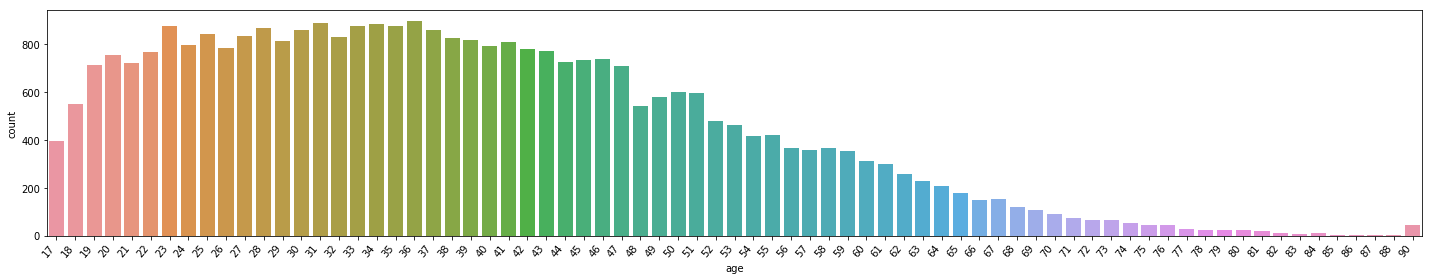

In [258]:
plt.figure(figsize=(20,4))

ax = sns.countplot(dataset['age'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()



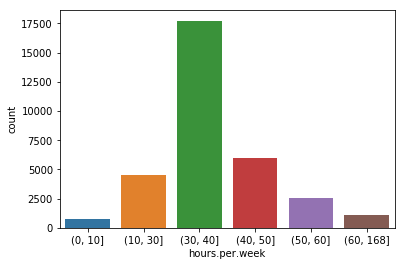

In [274]:
sns.countplot(pd.cut(dataset['hours.per.week'], [0,10,30,40,50,60,168]))

In [260]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [261]:
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

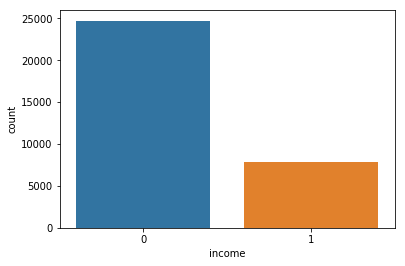

In [262]:
sns.countplot(dataset['income'],label="Count")

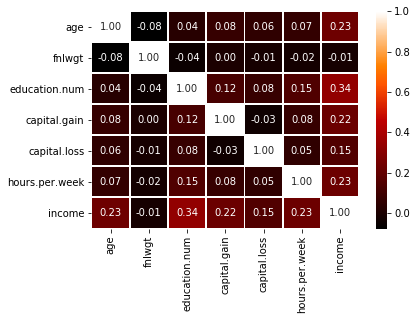

In [263]:
sns.heatmap(dataset[numeric_features].corr(),annot=True, fmt = ".2f", linewidth = 1 , cmap="gist_heat")



In [264]:
##edu_num = [1,      2,         3,        4,         5,     6,      7,      8,      9,         10,             11,          12,           13,          14,        15,            16]
##edu =    ["none", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters", "Prof-school", "Doctorate"]

<Figure size 1440x288 with 0 Axes>

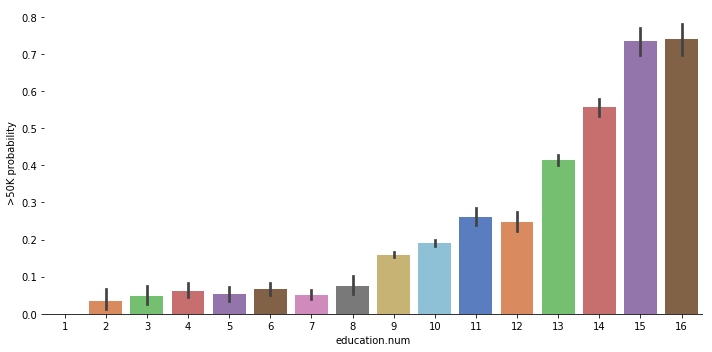

In [265]:
plt.figure(figsize=(20,4))

g = sns.factorplot(x="education.num",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

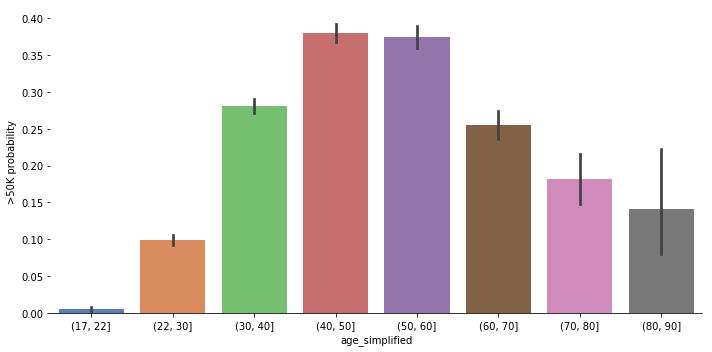

In [266]:
dataset['age_simplified'] = pd.cut(dataset['age'], [17,22,30,40,50,60,70,80,90])

g = sns.factorplot(x="age_simplified",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

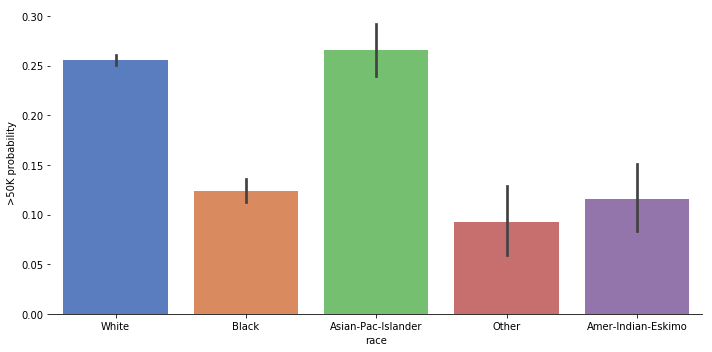

In [267]:
g = sns.factorplot(x="race",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

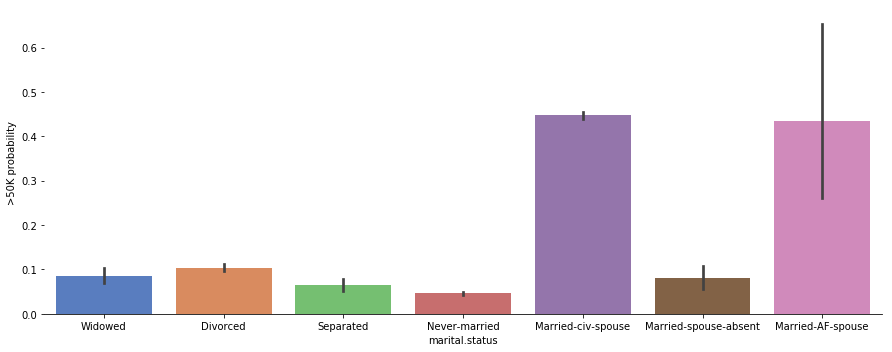

In [268]:
g = sns.factorplot(x="marital.status",y="income",data=dataset,kind="bar",aspect  = 2.5,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

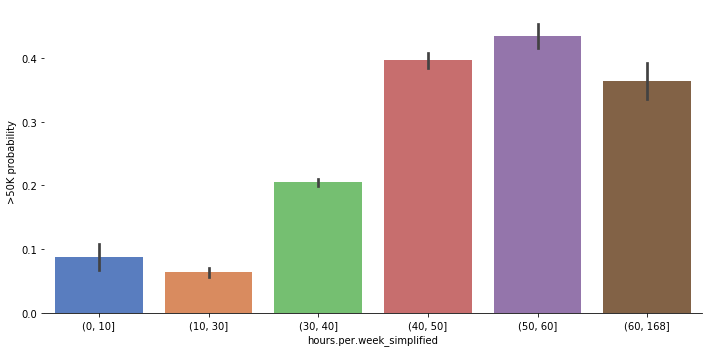

In [275]:
dataset['hours.per.week_simplified'] = pd.cut(dataset['hours.per.week'], [0,10,30,40,50,60,168])

g = sns.factorplot(x="hours.per.week_simplified",y="income",data=dataset,kind="bar",aspect  = 2,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

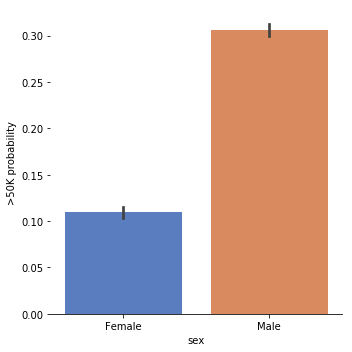

In [273]:
g = sns.factorplot(x="sex",y="income",data=dataset,kind="bar",aspect  = 1,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

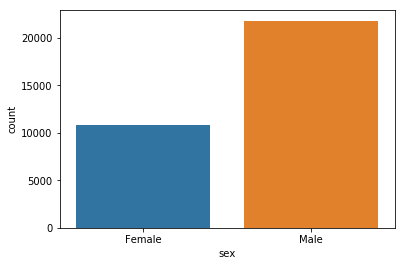

In [271]:
sns.countplot(dataset['sex'],label="Count")